# Example Report: Distribution of weather datasetin Aachen, Germany

This example uses open data from Mobilithek ( https://www.mcloud.de/downloads/mcloud/27899FD1-EBC5-428D-9214-996752F42EBB/AirQuality_Datensatz_August2021_Aachen.csv) and Meteostat (https://meteostat.net/en/station/10501?t=2021-08-01/2021-08-31)to render a correlation among various environmental attributes.


## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet.

In [3]:
%pip install pandas
%pip install matplotlib
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data
Create a pandas dataframe using the local sqlite file.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

aachen_mobilithek_data = pd.read_sql_table('aachen_mobilithek', 'sqlite:///data.sqlite')
aachen_meteostat_data = pd.read_sql_table('aachen_meteostat', 'sqlite:///data.sqlite')

In [6]:
aachen_meteostat_data.rename(columns={
    "dwpt": "dew point",
    "prcp": "precipitation",
    "rhum": "relative humidity",
    "wdir": "wind direction",
    "wspd": "average wind speed",
    "wpgt": "average wind gust",
    "pres": "pressure",
}, inplace=True)
aachen_meteostat_data.head(5)

,Date,Hour,temp,dew point,relative humidity,precipitation,wind direction,average wind speed,average wind gust,pressure
0,2021-08-01,0,14.1,13.0,93,0.0,216,9.3,14.8,1010.9
1,2021-08-01,1,13.8,12.9,94,0.0,212,11.1,16.7,1010.6
2,2021-08-01,2,13.6,13.0,96,0.0,213,11.1,16.7,1010.3
3,2021-08-01,3,13.4,12.5,94,0.0,215,13.0,18.5,1010.3
4,2021-08-01,4,13.2,12.6,96,0.0,217,13.0,18.5,1010.1


## Finding correlation among various weather attributes?

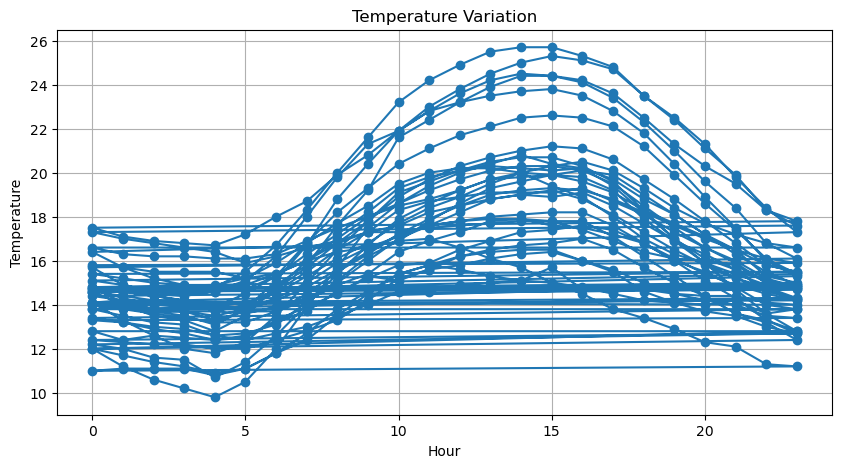

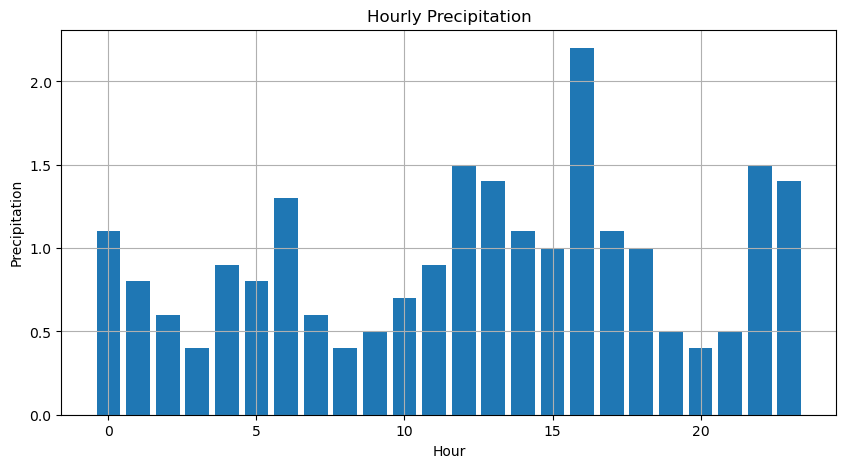

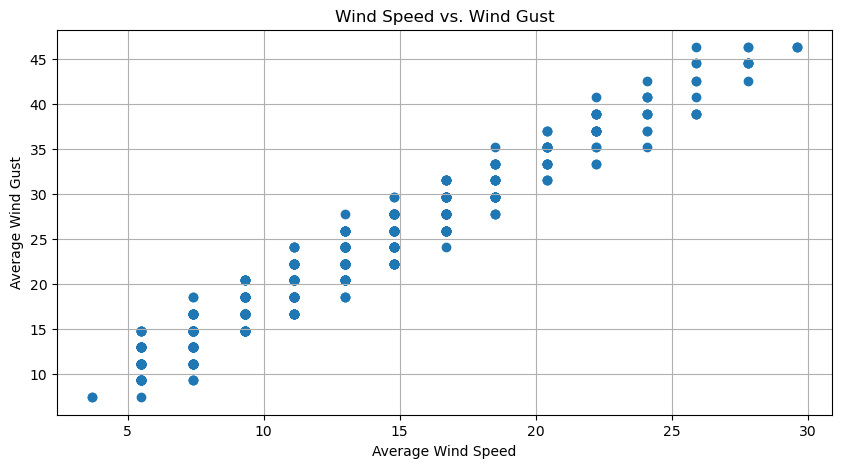

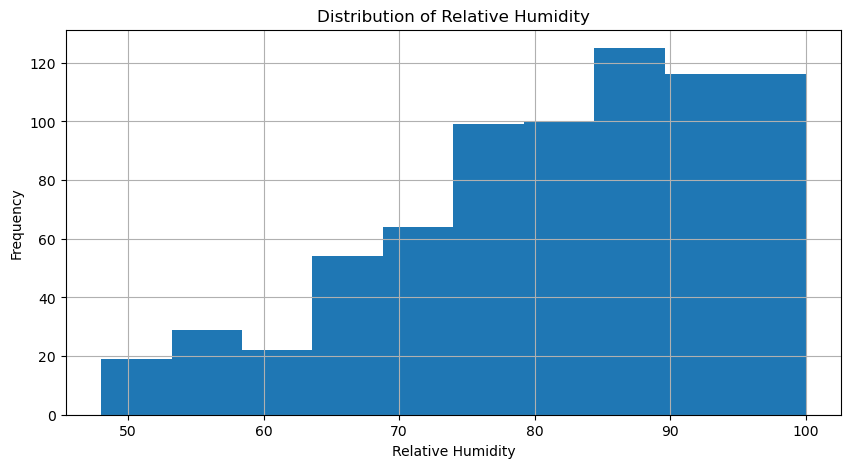

In [7]:
# Line plot of temperature over time
plt.figure(figsize=(10, 5))
plt.plot(aachen_meteostat_data['Hour'], aachen_meteostat_data['temp'], marker='o')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.grid(True)
plt.show()

# Bar plot of precipitation by hour
plt.figure(figsize=(10, 5))
plt.bar(aachen_meteostat_data['Hour'], aachen_meteostat_data['precipitation'])
plt.xlabel('Hour')
plt.ylabel('Precipitation')
plt.title('Hourly Precipitation')
plt.grid(True)
plt.show()

# Scatter plot of wind speed and wind gust
plt.figure(figsize=(10, 5))
plt.scatter(aachen_meteostat_data['average wind speed'], aachen_meteostat_data['average wind gust'])
plt.xlabel('Average Wind Speed')
plt.ylabel('Average Wind Gust')
plt.title('Wind Speed vs. Wind Gust')
plt.grid(True)
plt.show()

# Histogram of relative humidity
plt.figure(figsize=(10, 5))
plt.hist(aachen_meteostat_data['relative humidity'], bins=10)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Humidity')
plt.grid(True)
plt.show()